# Social Networks and Text Analysis - Models of Networks

In [9]:
## Only run this if you are using Google Colab and need to install new packages 
# via the notebook before you can use them
!pip install powerlaw

In [2]:
import networkx as nx
import numpy as np
import collections
import matplotlib.pyplot as plt
import re
from operator import itemgetter   
import powerlaw
import seaborn as sns

#Importing the necessary libraries for this lab:
#------------------------------------------------
import networkx as nx #---> Library for network analysis
import matplotlib.pyplot as plt #---> Library for creating plots
import collections #---> Library for operating with dictionaries
import numpy as np #---> Library for efficiently operating with arrays/matrices/vectors
from pylab import rcParams #---> Library for set the attributes of the figures
import re #---> Library for regular operations with string
from operator import itemgetter #---> Library for iterable obejcts
import seaborn as sns #---> Library for creating plots
import matplotlib.colors as mcolors #---> Library for setting colors of the plots

#Install it when first running this notebook
#!pip install powerlaw
import powerlaw #---> Library for analysing heavy tailed distributions


#Magic functions (%) for setting up the matplotlib and increase the resolution of the plots:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
# Question 2

# Define a function to draw a plot of a network based on user set parameters
def draw(G, pos, measures, measure_name):
    
    # Draw the nodes according to the position you have defined
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=list(measures.keys()))
    
    # Give the nodes colours
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.03, linscale=1))
    
    # Draw edges
    edges = nx.draw_networkx_edges(G, pos)

    # Plot the title and colour bar
    plt.title(measure_name)
    cbar = plt.colorbar(nodes)

    # Label the colour bar
    cbar.set_label('Weight', rotation=270)
    
    # Remove axis lines
    plt.axis('off')

    # Show the plot
    plt.show()

In [5]:
def draw_hist_network(G):
    '''This function draw a network and the degree dustribution
    
    Attributes:
    G: The networkx object
    ''' 
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  #<-- Save the degree of each node 
                                                                    #and order the list from highest to lowest

    degreeCount = collections.Counter(degree_sequence) #<-- Count the frequency (number of times) of each degree

    deg, cnt = zip(*degreeCount.items()) #<-- Function that create lists of iterables, 
                                         #one for the degrees and the other one for the frquencies

    rcParams['figure.figsize'] = 10, 5 #<-- Set the plot size
    fig, ax = plt.subplots() #<-- Create the subplots

    plt.bar(deg, cnt, width=0.80, color='darkblue') #<-- Plot a bar plot with the degrees and their frequencies

    #Set plot attributes as title, x and y labels, and ticks with frequencies larger than zero
    plt.title("Degree Histogram")
    plt.ylabel("Count")
    plt.xlabel("Degree")
    ax.set_xticks([d + 0.4 for d in deg])
    ax.set_xticklabels(deg)

    #Draw the network inside the barplot
    plt.axes([0.4, 0.4, 0.5, 0.5])

    #Select the largest connected component of the network:
    Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])

    pos = nx.spring_layout(G) #<-- Set the layout of the network
    plt.axis('off') #<-- Remove the axis of the network plot
    nx.draw_networkx_nodes(G, pos, node_color= 'darkblue',node_size=20) #<-- Plot the nodes
    nx.draw_networkx_edges(G, pos, alpha=0.4) #<-- Plot the edges

    plt.show()

# 1.a Generating the Small World Random graph

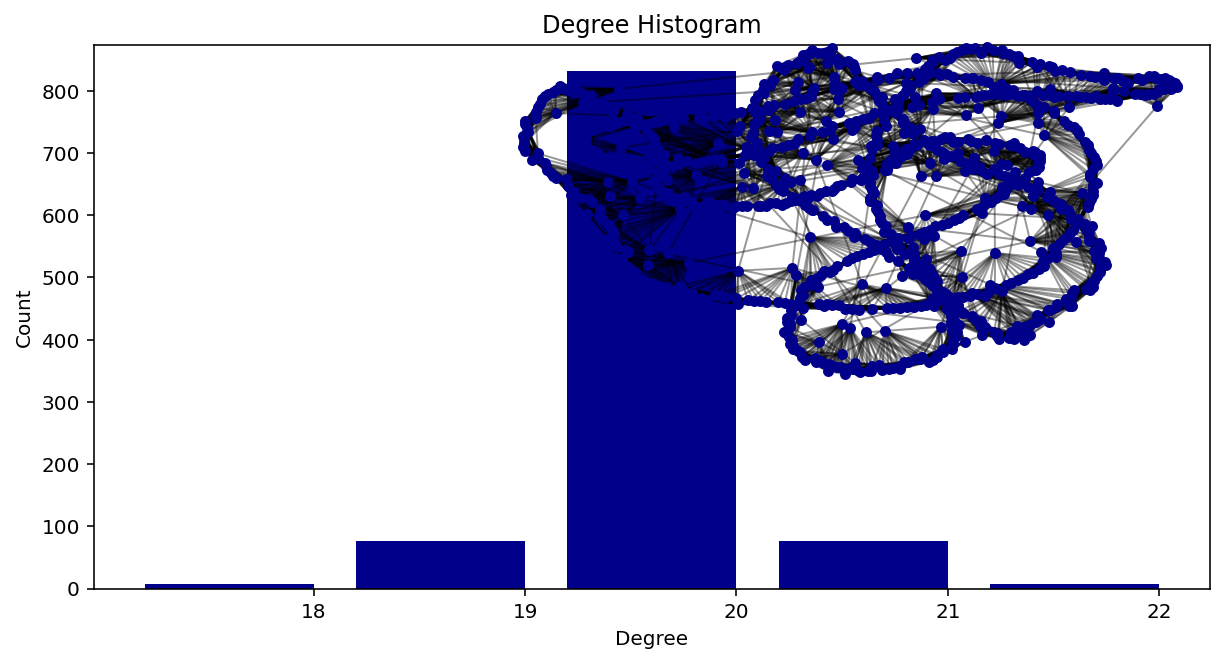

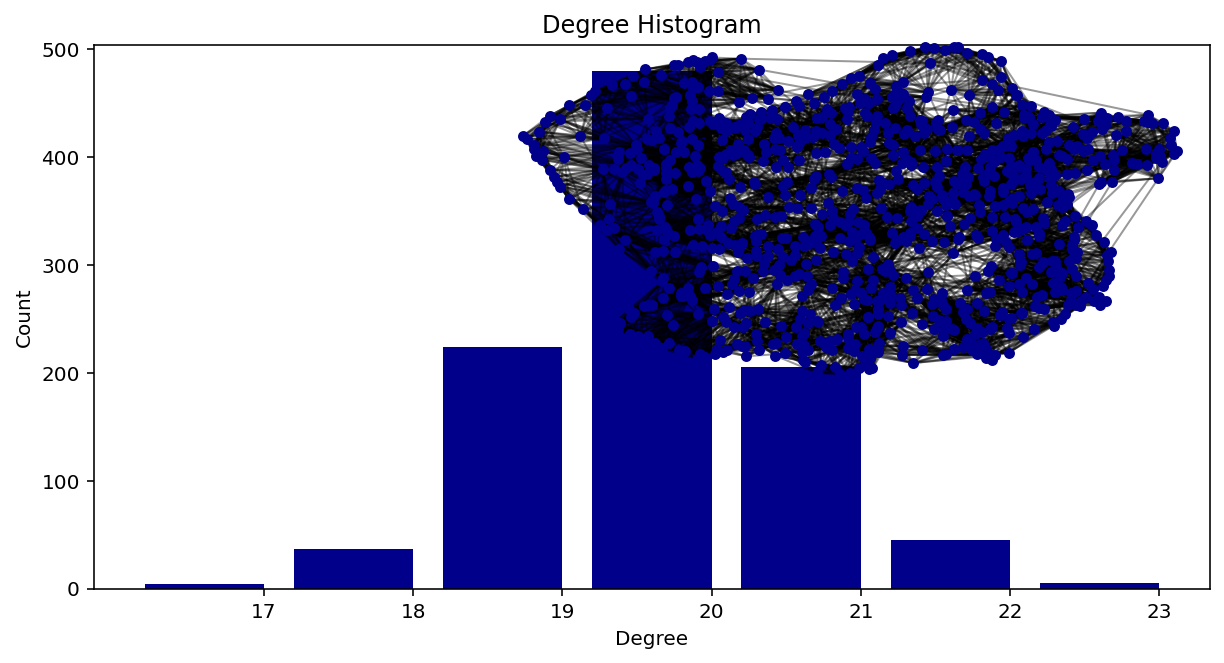

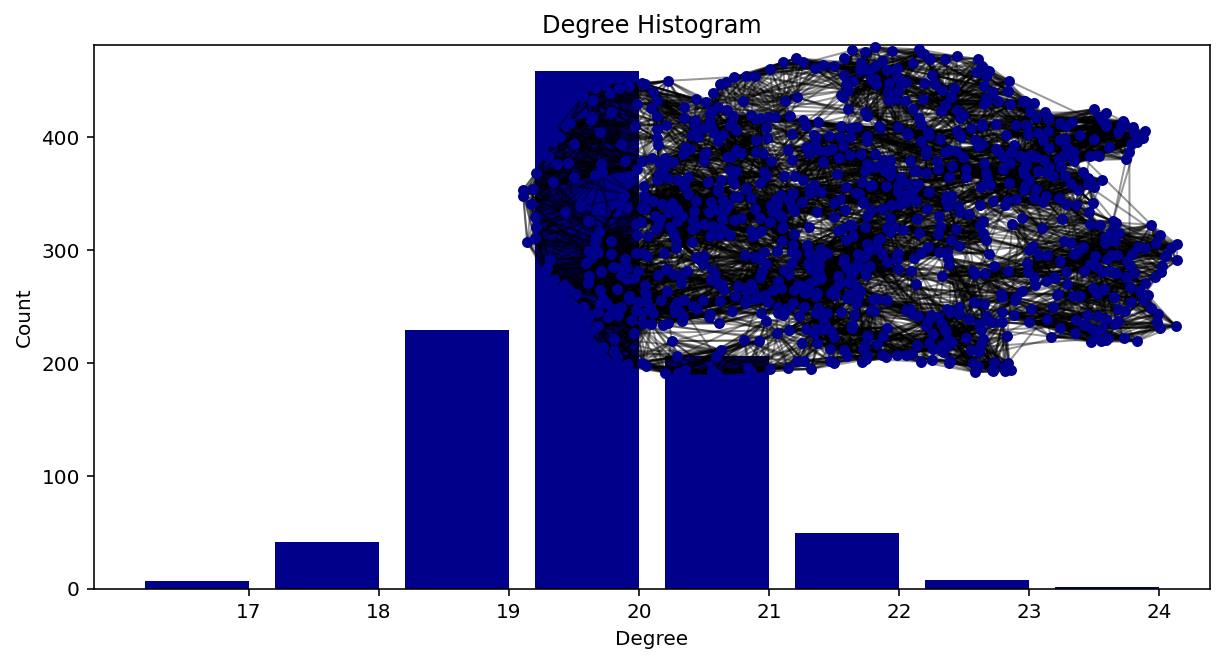

In [6]:
#Defining the variables
#----------------------
nodes_n=1000 # <-- Number of nodes desired for the network
degree=20 # <-- Average degree of the nodes
simulation_number=10 # <-- Number of iterations of the Small World generator

rcParams['figure.figsize'] = 5, 5 #<-- Set the plot size

#Connection probability = 0.01:
#------------------------------
G = nx.watts_strogatz_graph(nodes_n,degree, p = 0.01) #<-- Generate the Small World Network
draw_hist_network(G)

#Connection probability = 0.05:
#------------------------------
G = nx.watts_strogatz_graph(nodes_n,degree, p = 0.05) #<-- Generate the Small World Network
draw_hist_network(G)

#Connection probability = 1:
#------------------------------
G = nx.watts_strogatz_graph(nodes_n,degree, p = 0.05) #<-- Generate the Small World Network
draw_hist_network(G)

# 1.b Exploring clustering a shortest path of Small World Random graph

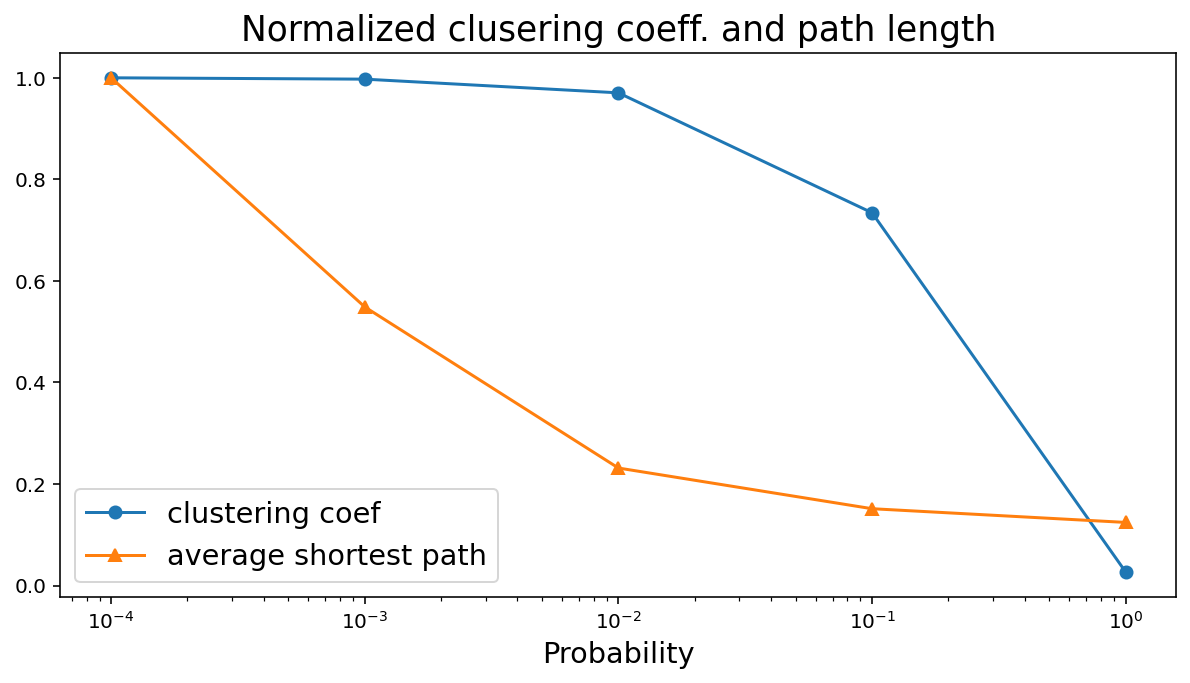

In [7]:

range_probability=np.logspace(-4, 0,num=5) # <-- Function to create a range with 4 decimal position until 1
clustering_coef=np.zeros(len(range_probability)) # <-- Create a vector of size 10 for the clustering coefficient
average_short=np.zeros(len(range_probability)) # <-- Create a vector of size 10 for the averegae shortest path


#Iterate over the 10 probabilities of connection:
#------------------------------------------------
for k in range(len(range_probability)):
    
    data_sim=np.zeros((2,simulation_number)) #<-- Array to store the results of each simulation
    
    #Iterate over the number of simulations with the same probability k:
    for l in range(simulation_number):
        
        G = nx.watts_strogatz_graph(nodes_n,degree,range_probability[k]) #<-- Generate the Small World Network
        data_sim[0][l]=nx.average_clustering(G) #<-- Calculate the average clustering coefficient
        data_sim[1][l]=nx.average_shortest_path_length(G) #<-- Calculate the average shortest path length
     
    clustering_coef[k]=np.mean(data_sim,1)[0] #<-- Compute the mean of the clustering for k
    average_short[k]=np.mean(data_sim,1)[1] #<-- Compute the mean of the shortest path length for k

#plotting the results (please note the definition of normalized sclustering coeff. and normalized path length)    
plt.plot(range_probability,clustering_coef/clustering_coef[0],'-o', label='clustering coef')
plt.plot(range_probability,average_short/average_short[0],'-^', label='average shortest path')

plt.title('Normalized clusering coeff. and path length', fontsize='xx-large')
plt.xlabel('Probability', fontsize='x-large')
plt.legend(fontsize='x-large')
plt.ylabel('')
plt.xscale('log')

# 2. Frequency of words

In [9]:
with open('Book.txt') as f: #<-- #Read dowloaded book in txt format: THE SCARLET LETTER.
    text = f.read()

In [10]:
words = re.findall(r'\w+', text) #<-- Select the element of the text that are words
Counting_words = dict(collections.Counter(words)) #<-- Count the words

#Order the counting: lambda is another way to write functions: https://www.w3schools.com/python/python_lambda.asp
Ordered_Frequency = {k: v for k, v in sorted(Counting_words.items(), key=lambda item: item[1], reverse = True)}

#Calculate the absolut frequency:
Absolut_frequency = {k:Ordered_Frequency[k]/np.sum(list(Ordered_Frequency.values())) for k in Ordered_Frequency.keys()}


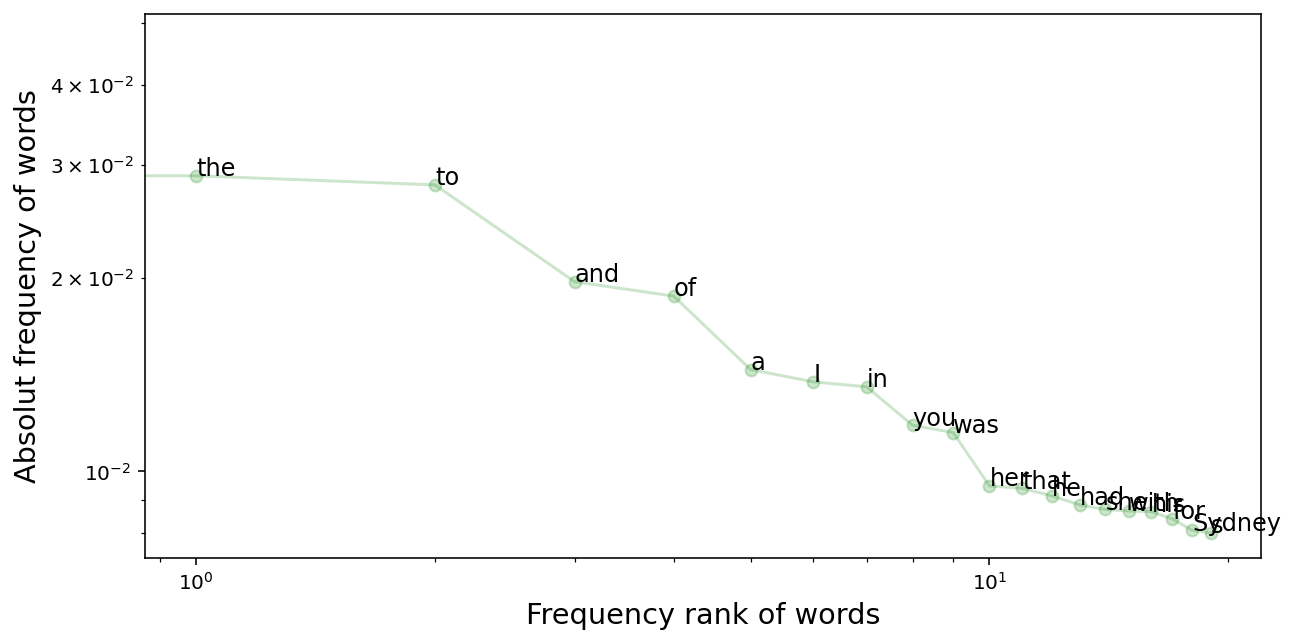

In [11]:
#Plotting the 20 most common words:
#----------------------------------
n = 20
Rank = [i for i in range(n)]
x = Rank
y = list(Absolut_frequency.values())[:n]

ax = plt.subplot(111) #<-- define the plot to allow annotation
ax.loglog(x,y,'go-', alpha=0.2) #<-- plot in the log log form
Strings = list(Ordered_Frequency.keys()) #<-- Set the top 20 most frequent words

#The annotations start position in 1 then we sum 1 or do a range(1,20)
for i in range(19):
    ax.annotate(Strings[i], xy=(x[i+1], y[i+1]), fontsize=12)
    
plt.xlabel('Frequency rank of words', fontsize = 'x-large')
plt.ylabel('Absolut frequency of words', fontsize = 'x-large')
plt.show()


In [12]:
#We are using the powerplot package see the paper Jeff Alstott ,Ed Bullmore,Dietmar Plenz,  
# powerlaw: A Python Package for Analysis of Heavy-Tailed Distributions,  
#  PlosOne 2014 DOI: 10.1371/journal.pone.0085777
# or the repository https://github.com/jeffalstott/powerlaw
def Plot_pdf_CCDF(Data, xlabel, ylabel):

    
    '''This function plot and compares the the Probability Density Function (PDF) and the Complement Cummulative
    Density Function. This functions are taken from the paper: https://doi.org/10.1371/journal.pone.0085777
    
    Attributes:
    Data: An array of values
    '''
    
    fit = powerlaw.Fit(Data) #<-- Fit the data
    fig2=fit.plot_pdf(color='b', linewidth=2) #<-- Plot the PDF of the original data

    fit.power_law.plot_pdf(color='b', linestyle='dashed', ax=fig2) #<-- Plot the PDF of the power law fit

    fit.plot_ccdf(color='r', linewidth=2, ax=fig2) #<-- Plot the PDF of the original data in the same fig

    fit.power_law.plot_ccdf(color='r', linestyle='dashed', ax=fig2) #<-- Plot the PDF of the power law fit

    plt.legend(['Data pdf', 'fit PDF', 'Data CCDF', 'fit CCDF'], fontsize = 'x-large')
    plt.xlabel(xlabel, fontsize = 'x-large')
    plt.ylabel(ylabel, fontsize = 'x-large')
    plt.show()

Calculating best minimal value for power law fit
/usr/local/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /
/usr/local/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /


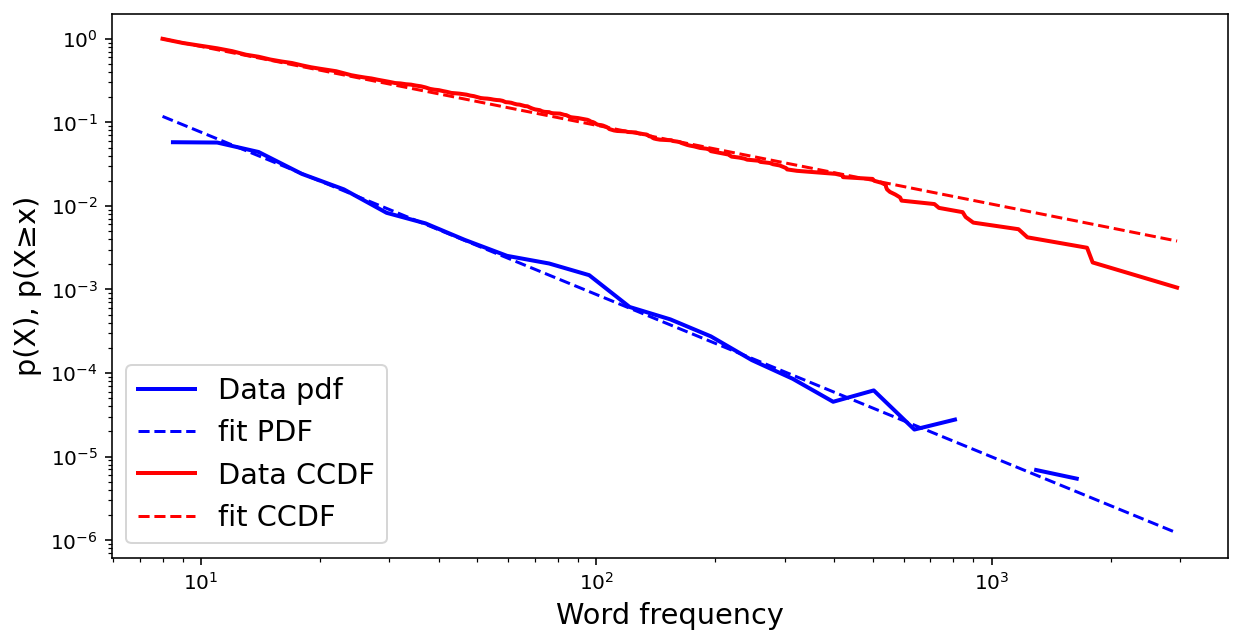

In [13]:
 Plot_pdf_CCDF(list(Ordered_Frequency.values()), 'Word frequency', 'p(X), p(X≥x)')

# Barabasi Albert 

Text(0, 0.5, 'Frequency')

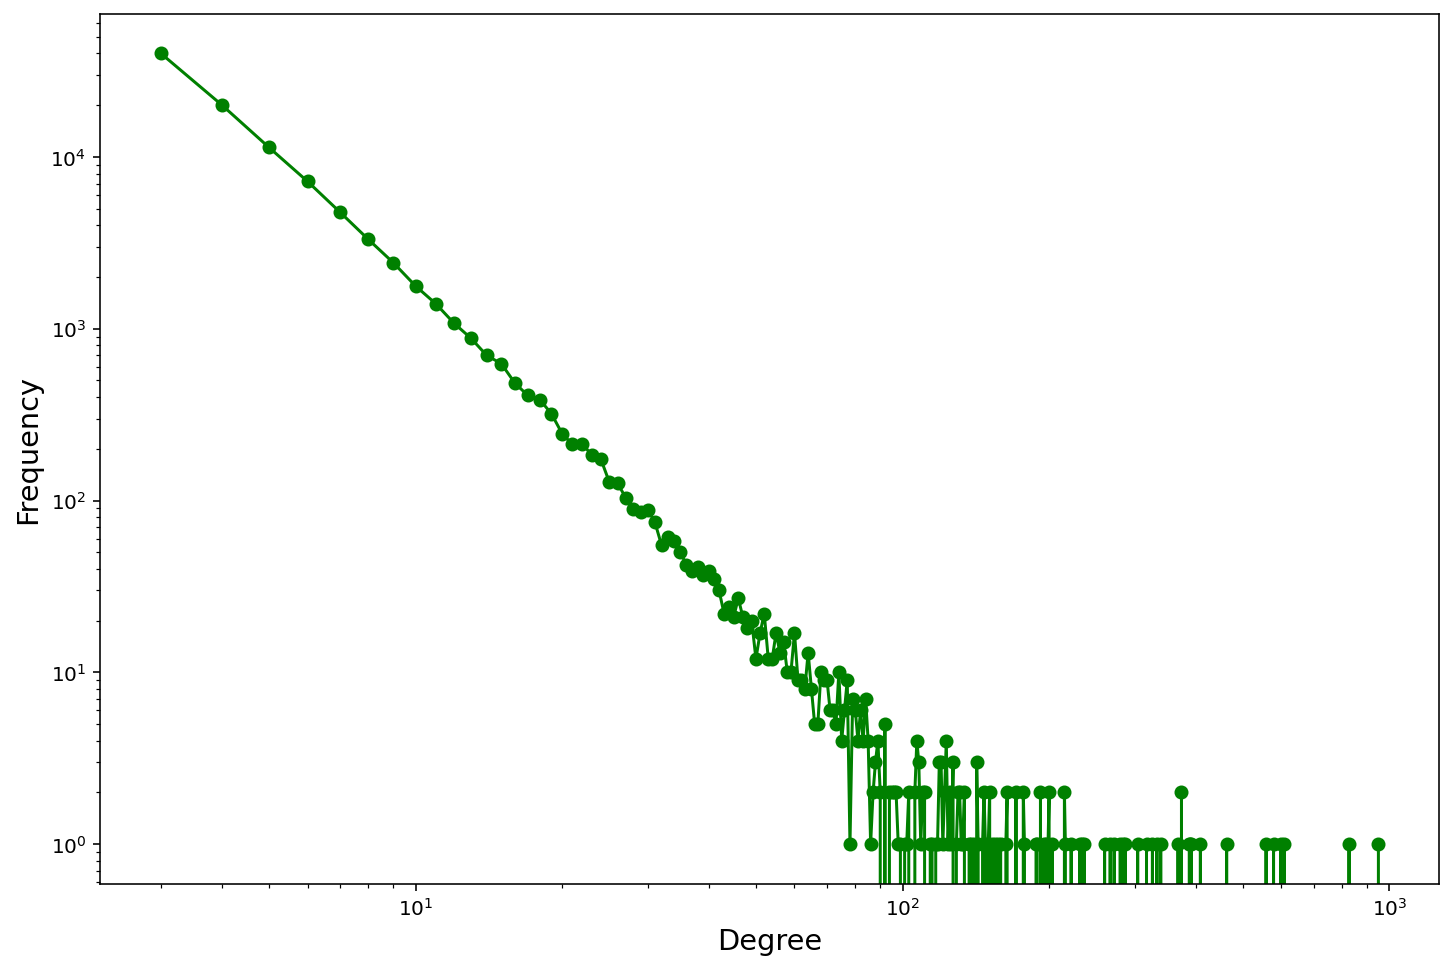

In [16]:
# Create a Barabasi-Albert network
m=3
G = nx.barabasi_albert_graph(100000, m) #<-- Generate a Barabasi Albert network with 100,000 nodes and 
                                        # an average of 3 links per node

degree_freq = nx.degree_histogram(G)
degrees = range(len(degree_freq))
plt.figure(figsize=(12, 8)) 
plt.loglog(degrees[m:], degree_freq[m:],'go-') 
plt.xlabel('Degree', fontsize = 'x-large')
plt.ylabel('Frequency', fontsize = 'x-large')

In [18]:
from scipy.stats.kde import gaussian_kde
from numpy import linspace
def plot(data):
    """ Plot Distribution """
    plt.plot(range(len(data)),data,'bo')
    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel('Frequency', fontsize = 'x-large')
    plt.xlabel('Degree', fontsize = 'x-large')
    plt.show()


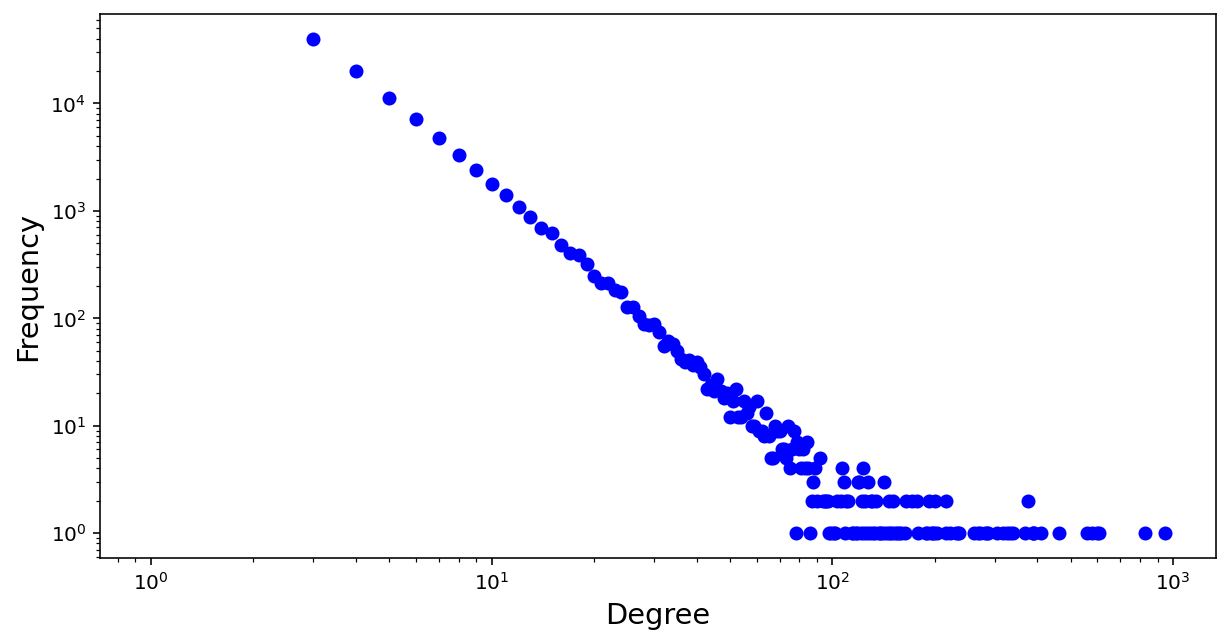

In [19]:
plot(np.bincount(list(dict(G.degree()).values())))

Calculating best minimal value for power law fit
/usr/local/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /
/usr/local/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /


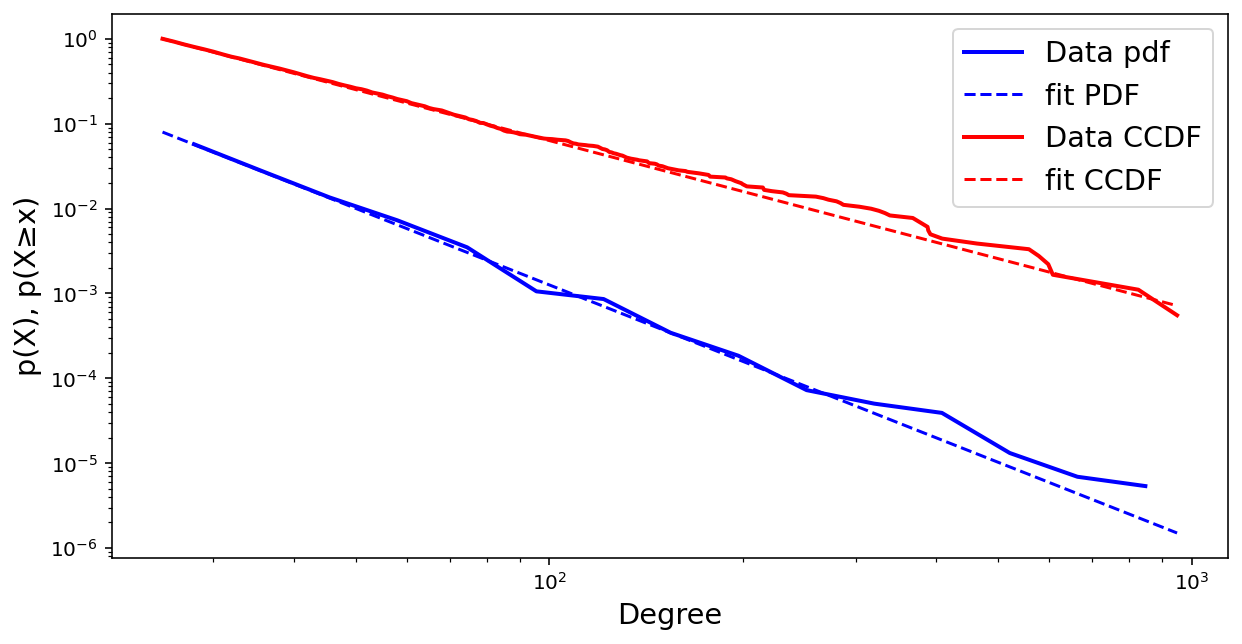

In [20]:
Plot_pdf_CCDF(list(dict(nx.degree(G)).values()), 'Degree', 'p(X), p(X≥x)')


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
/usr/local/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /
/usr/local/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /


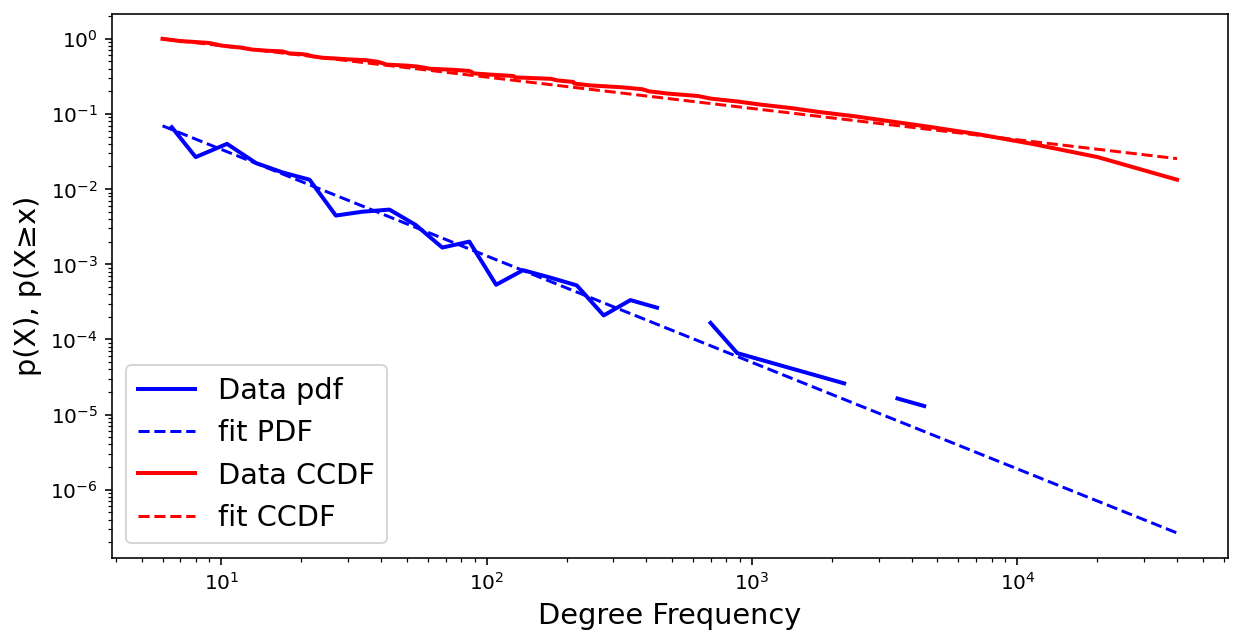

In [21]:
Plot_pdf_CCDF(nx.degree_histogram(G), 'Degree Frequency', 'p(X), p(X≥x)')